In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from functools import partial

In [5]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!


In [6]:
def generalRegressionPredictor(self, transformedData):
    return self.predict(transformedData)

In [7]:
annArborDf = pd.read_excel("./AnnArbor.xlsx")
# annArborDf = pd.read_excel("https://www.dropbox.com/scl/fi/bkcdp9tpqqh6dfr6phtt8/AnnArbor.xlsx?rlkey=0agfqwc7f0kt7oqb3e2h6q3qs&dl=1")
annArborDf

,Rent,Beds,Baths,Sqft
0,645,1,1.0,500
1,675,1,1.0,648
2,760,1,1.0,700
3,800,1,1.0,903
4,820,1,1.0,817
5,850,2,1.0,920
6,855,1,1.0,900
7,859,1,1.0,886
8,900,1,1.5,1000
9,905,2,1.0,920


In [8]:
annArborSampleData = {
    "Beds": [1],
    "Baths": [1.0],
    "Sqft": [500]
}
annArborSampleData

{'Beds': [1], 'Baths': [1.0], 'Sqft': [500]}

In [9]:
annArborDf.describe()

,Rent,Beds,Baths,Sqft
count,40.000000,40.000000,40.000000,40.000000
mean,1222.925000,2.200000,1.750000,1286.025000
std,424.804413,0.911465,0.816497,645.813678
min,645.000000,1.000000,1.000000,500.000000
25%,905.000000,2.000000,1.000000,920.000000
50%,1067.000000,2.000000,1.750000,1163.500000
75%,1504.500000,3.000000,2.000000,1403.000000
max,2400.000000,5.000000,4.000000,4319.000000


In [10]:
annArborDf.size

160

In [11]:
annArborDf.shape

(40, 4)

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

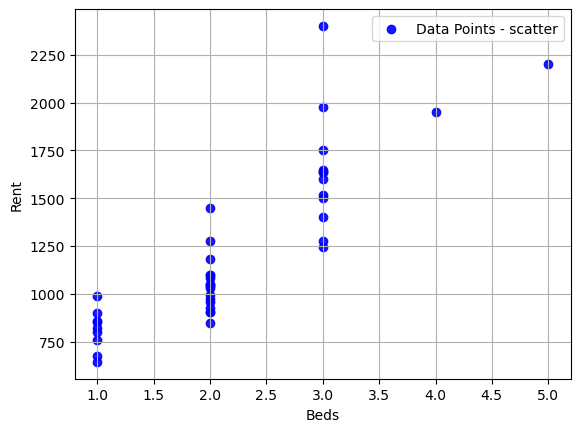

In [14]:
plt.scatter(
  annArborDf["Beds"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Beds')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

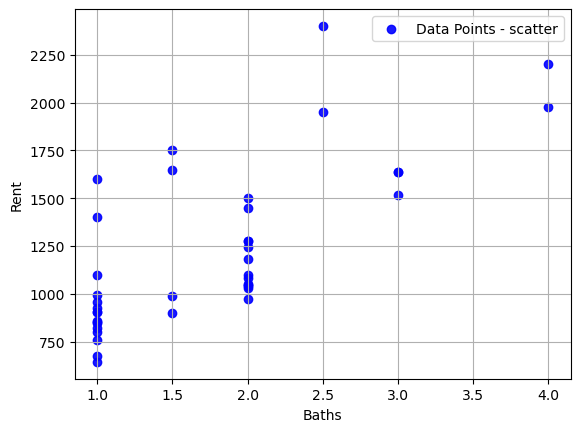

In [15]:
plt.scatter(
  annArborDf["Baths"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Baths')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

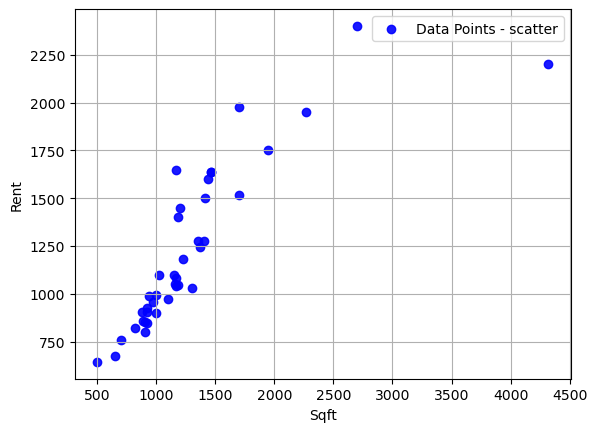

In [16]:
plt.scatter(
  annArborDf["Sqft"],
  annArborDf["Rent"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

In [17]:
def annArborRegModel1Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[['Sqft']],has_constant='add')
    return dfTransformer

annArborRegModel1 = sm.OLS(
  annArborDf["Rent"],
  annArborRegModel1Transformer(annArborDf)
)
annArborRegModel1Fit = annArborRegModel1.fit()
print(annArborRegModel1Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.53
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.34e-11
Time:                        02:37:21   Log-Likelihood:                -273.94
No. Observations:                  40   AIC:                             551.9
Df Residuals:                      38   BIC:                             555.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        512.9794     83.285      6.159      0.0

In [18]:
annArborRegModel1Transformer(annArborSampleData)

,const,Sqft
0,1.0,500


In [133]:
annArborRegModel1Fit.transformer = annArborRegModel1Transformer
annArborRegModel1Fit.mainPredictor = partial(generalRegressionPredictor, annArborRegModel1Fit)
registerAJrjModel(
    annArborRegModel1Fit,
    {
        "modelName":f"raoyi_li_annArborRegModel1Fit",
        "version":"1.0.4",
        "params": annArborRegModel1Fit.params.to_dict(),
        "score": float(annArborRegModel1Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": annArborRegModel1Fit.pvalues.to_dict(),
            "r_squared": float(annArborRegModel1Fit.rsquared),
            "adj_r_squared": float(annArborRegModel1Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel1Fit__1.0.4.pkl.zip


{'_id': '685c9655aa1bdf32036bac49',
 'modelName': 'raoyi_li_annArborRegModel1Fit',
 'version': '1.0.4',
 'params': {'const': 512.9794394690878, 'Sqft': 0.5520464691828797},
 'score': 0.7043486919128319,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 3.4422139003658775e-07,
   'Sqft': 1.3355625370204889e-11},
  'r_squared': 0.7043486919128319,
  'adj_r_squared': 0.6965683943315906},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 8548,
 'zippedModelSizeBytes': 4082,
 's3Url': '273-g2/raoyi_li_annArborRegModel1Fit__1.0.4.pkl.zip',
 'createdAt': '2025-06-26T00:37:41.289Z',
 'updatedAt': '2025-06-26T00:37:41.289Z'}

In [135]:
predictedRent1 = annArborRegModel1Fit.predict(annArborRegModel1Transformer(annArborDf))
annArborDf['predictedRent1'] = predictedRent1
annArborDf

,Rent,Beds,Baths,Sqft,predictedRent1,log(Sqft)
0,645,1,1.0,500,789.002674,6.214608
1,675,1,1.0,648,870.705551,6.473891
2,760,1,1.0,700,899.411968,6.551080
3,800,1,1.0,903,1011.477401,6.805723
4,820,1,1.0,817,964.001405,6.705639
5,850,2,1.0,920,1020.862191,6.824374
6,855,1,1.0,900,1009.821262,6.802395
7,859,1,1.0,886,1002.092611,6.786717
8,900,1,1.5,1000,1065.025909,6.907755
9,905,2,1.0,920,1020.862191,6.824374


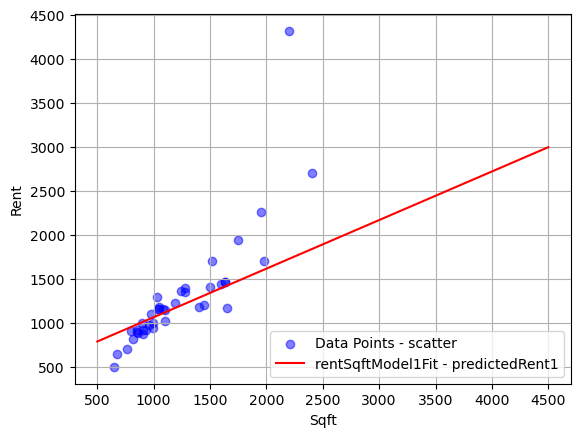

In [137]:
plt.scatter(
  annArborDf["Rent"],
  annArborDf["Sqft"],
  color='blue',
  alpha=0.5,
  label='Data Points - scatter',
)

intercept = annArborRegModel1Fit.params['const']
sqFtSlope = annArborRegModel1Fit.params['Sqft']
x_values = np.linspace(500, 4500, 200)
y_values = intercept + sqFtSlope * x_values

plt.plot(
  x_values,
  y_values,
  color='red',
  label='rentSqftModel1Fit - predictedRent1'
)
plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)


plt.show()

In [139]:
def annArborRegModel2Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[["Beds", "Baths", "Sqft"]],has_constant='add')
    return dfTransformer
annArborRegModel2 = sm.OLS(
  annArborDf["Rent"],
  annArborRegModel2Transformer(annArborDf)
)
annArborRegModel2Fit = annArborRegModel2.fit()
print(annArborRegModel2Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     50.88
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           4.99e-13
Time:                        02:37:48   Log-Likelihood:                -265.19
No. Observations:                  40   AIC:                             538.4
Df Residuals:                      36   BIC:                             545.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.4116     84.011      3.576      0.0

In [146]:
annArborRegModel2Fit.transformer = annArborRegModel2Transformer
annArborRegModel2Fit.mainPredictor = partial(generalRegressionPredictor, annArborRegModel2Fit)
registerAJrjModel(
    annArborRegModel2Fit,
    {
        "modelName":f"raoyi_li_annArborRegModel2Fit",
        "version":"1.0.4",
        "params": annArborRegModel2Fit.params.to_dict(),
        "score": float(annArborRegModel2Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": annArborRegModel2Fit.pvalues.to_dict(),
            "r_squared": float(annArborRegModel2Fit.rsquared),
            "adj_r_squared": float(annArborRegModel2Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel2Fit__1.0.4.pkl.zip


{'_id': '685c9662aa1bdf32036bac4b',
 'modelName': 'raoyi_li_annArborRegModel2Fit',
 'version': '1.0.4',
 'params': {'const': 300.4116035189384,
  'Beds': 225.80998342637065,
  'Baths': 89.26613431740492,
  'Sqft': 0.20957267384966205},
 'score': 0.809150858454385,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.0010178753397337822,
   'Beds': 0.0006341384088422965,
   'Baths': 0.11946575148451288,
   'Sqft': 0.027582264303817463},
  'r_squared': 0.809150858454385,
  'adj_r_squared': 0.7932467633255837},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 10701,
 'zippedModelSizeBytes': 4998,
 's3Url': '273-g2/raoyi_li_annArborRegModel2Fit__1.0.4.pkl.zip',
 'createdAt': '2025-06-26T00:37:54.746Z',
 'updatedAt': '2025-06-26T00:37:54.746Z'}

In [149]:
def annArborRegModel3Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    import math
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['log(Sqft)'] = df.apply(lambda row: math.log(row['Sqft']), axis=1)
    dfTransformer = sm.add_constant(df[["Beds", "Baths", "Sqft", 'log(Sqft)']],has_constant='add')
    return dfTransformer

In [151]:
annArborDf['log(Sqft)'] = annArborRegModel3Transformer(annArborDf)['log(Sqft)']
annArborDf

,Rent,Beds,Baths,Sqft,predictedRent1,log(Sqft)
0,645,1,1.0,500,789.002674,6.214608
1,675,1,1.0,648,870.705551,6.473891
2,760,1,1.0,700,899.411968,6.551080
3,800,1,1.0,903,1011.477401,6.805723
4,820,1,1.0,817,964.001405,6.705639
5,850,2,1.0,920,1020.862191,6.824374
6,855,1,1.0,900,1009.821262,6.802395
7,859,1,1.0,886,1002.092611,6.786717
8,900,1,1.5,1000,1065.025909,6.907755
9,905,2,1.0,920,1020.862191,6.824374


In [153]:
annArborRegModel3 = sm.OLS(
  annArborDf["Rent"],
  annArborRegModel3Transformer(annArborDf)
)
annArborRegModel3Fit = annArborRegModel3.fit()
print(annArborRegModel3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     49.79
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           5.70e-14
Time:                        02:37:57   Log-Likelihood:                -260.30
No. Observations:                  40   AIC:                             530.6
Df Residuals:                      35   BIC:                             539.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4851.2090   1656.654     -2.928      0.0

In [155]:
annArborRegModel3Fit.transformer = annArborRegModel3Transformer
annArborRegModel3Fit.mainPredictor = partial(generalRegressionPredictor, annArborRegModel3Fit)
registerAJrjModel(
    annArborRegModel3Fit,
    {
        "modelName":f"raoyi_li_annArborRegModel3Fit",
        "version":"1.0.4",
        "params": annArborRegModel3Fit.params.to_dict(),
        "score": float(annArborRegModel3Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": annArborRegModel3Fit.pvalues.to_dict(),
            "r_squared": float(annArborRegModel3Fit.rsquared),
            "adj_r_squared": float(annArborRegModel3Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel3Fit__1.0.4.pkl.zip


{'_id': '685c966aaa1bdf32036bac4c',
 'modelName': 'raoyi_li_annArborRegModel3Fit',
 'version': '1.0.4',
 'params': {'const': -4851.209017403617,
  'Beds': 131.33610312099472,
  'Baths': 36.52683977325262,
  'Sqft': -0.09425398717788103,
  'log(Sqft)': 825.5317809737264},
 'score': 0.8505321997715642,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.005957852355785289,
   'Beds': 0.04155504395105346,
   'Baths': 0.49535297806425127,
   'Sqft': 0.4644059811123501,
   'log(Sqft)': 0.0036801629461432586},
  'r_squared': 0.8505321997715642,
  'adj_r_squared': 0.833450165459743},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 12138,
 'zippedModelSizeBytes': 5866,
 's3Url': '273-g2/raoyi_li_annArborRegModel3Fit__1.0.4.pkl.zip',
 'createdAt': '2025-06-26T00:38:02.135Z',
 'updatedAt': '2025-06-26T00:38:02.135Z'}

In [156]:
def annArborRegModel4Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    import math
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['log(Sqft)'] = df.apply(lambda row: math.log(row['Sqft']), axis=1)
    dfTransformer = sm.add_constant(df[["Beds", 'log(Sqft)']],has_constant='add')
    return dfTransformer

In [159]:
annArborRegModel4 = sm.OLS(
  annArborDf["Rent"],
  annArborRegModel4Transformer(annArborDf)
)
annArborRegModel4Fit = annArborRegModel4.fit()
print(annArborRegModel4Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           9.12e-16
Time:                        02:38:05   Log-Likelihood:                -260.88
No. Observations:                  40   AIC:                             527.8
Df Residuals:                      37   BIC:                             532.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4261.7001    916.183     -4.652      0.0

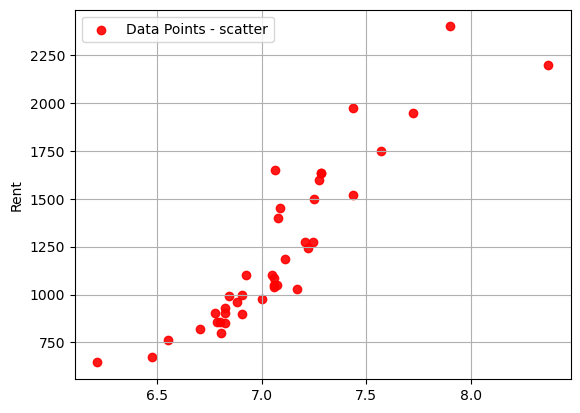

In [161]:
# plt.scatter(
#   annArborDf["Sqft"],
#   annArborDf["Rent"],
#   color='blue',
#   alpha=0.9,
#   label='Data Points - scatter',
# )

plt.scatter(
  annArborDf["log(Sqft)"],
  annArborDf["Rent"],
  color='red',
  alpha=0.9,
  label='Data Points - scatter',
)


# plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)



plt.show()

In [173]:
annArborRegModel4Fit.transformer = annArborRegModel4Transformer
annArborRegModel4Fit.mainPredictor = partial(generalRegressionPredictor, annArborRegModel4Fit)
registerAJrjModel(
    annArborRegModel4Fit,
    {
        "modelName":f"raoyi_li_annArborRegModel4Fit",
        "version":"1.0.6",
        "params": annArborRegModel4Fit.params.to_dict(),
        "score": float(annArborRegModel4Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": annArborRegModel4Fit.pvalues.to_dict(),
            "r_squared": float(annArborRegModel4Fit.rsquared),
            "adj_r_squared": float(annArborRegModel4Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel4Fit__1.0.6.pkl.zip


{'_id': '685c967faa1bdf32036bac50',
 'modelName': 'raoyi_li_annArborRegModel4Fit',
 'version': '1.0.6',
 'params': {'const': -4261.700098894524,
  'Beds': 132.23269284598473,
  'log(Sqft)': 733.8615063772214},
 'score': 0.8461792715626474,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 4.1165649378889145e-05,
   'Beds': 0.03738778346132765,
   'log(Sqft)': 1.2520033968642e-05},
  'r_squared': 0.8461792715626474,
  'adj_r_squared': 0.8378646375930607},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 9954,
 'zippedModelSizeBytes': 4846,
 's3Url': '273-g2/raoyi_li_annArborRegModel4Fit__1.0.6.pkl.zip',
 'createdAt': '2025-06-26T00:38:23.332Z',
 'updatedAt': '2025-06-26T00:38:23.332Z'}

In [175]:
## AFTER AREFULLY LOOKUP WE RELIZED  annArborRegModel4Fit SO LETS KEEP IT AS THE BEST

In [177]:
compareDf = pd.read_csv('./annArborModelsComparison.csv')
compareDf

,Models,annArborRegModel1Fit,annArborRegModel2Fit,annArborRegModel3Fit,annArborRegModel4Fit
0,Comments,Linear,Linear,non Linear,non Linear
1,Intercept,512.9794 0.0,300.4116 0.001,-4851.2 0.06,-4261.7 0.0
2,Beds,x,225.81 0.001,131.336 0.042,132.2327 0.037
3,Baths,x,89.266 0.119 *,36.5268 0.4595 *,x
4,Sqft,0.552 0.0,0.209 0.028,-0.0943 0.464 *,x
5,log(Sqft),x,x,825.5318 0.004,733.8615 0.0
6,NaN,NaN,NaN,NaN,NaN
7,R2,0.704,0.809,0.851,0.846 - best


In [181]:
registerAJrjModel(
    annArborRegModel4Fit,
    {
        "modelName":f"raoyi_li_annArborRegModel4Fit",
        "version":"1.0.7",
        "params": annArborRegModel4Fit.params.to_dict(),
        "score": float(annArborRegModel4Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": annArborRegModel4Fit.pvalues.to_dict(),
            "r_squared": float(annArborRegModel4Fit.rsquared),
            "adj_r_squared": float(annArborRegModel4Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel4Fit__1.0.7.pkl.zip


{'_id': '685c968faa1bdf32036bac52',
 'modelName': 'raoyi_li_annArborRegModel4Fit',
 'version': '1.0.7',
 'params': {'const': -4261.700098894524,
  'Beds': 132.23269284598473,
  'log(Sqft)': 733.8615063772214},
 'score': 0.8461792715626474,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 4.1165649378889145e-05,
   'Beds': 0.03738778346132765,
   'log(Sqft)': 1.2520033968642e-05},
  'r_squared': 0.8461792715626474,
  'adj_r_squared': 0.8378646375930607},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 9954,
 'zippedModelSizeBytes': 4846,
 's3Url': '273-g2/raoyi_li_annArborRegModel4Fit__1.0.7.pkl.zip',
 'createdAt': '2025-06-26T00:38:39.964Z',
 'updatedAt': '2025-06-26T00:38:39.964Z'}

### Using Decision Trees

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
rt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [38]:
rt.fit(annArborRegModel4Transformer(annArborDf), annArborDf["Rent"])
  

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

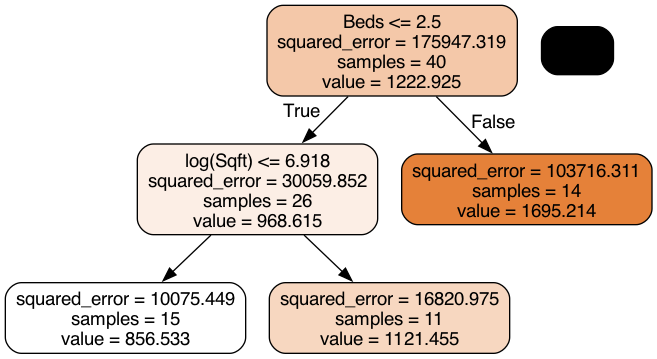

In [39]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(rt, out_file=dot_data, filled=True, rounded=True,
                feature_names=annArborRegModel4Transformer(annArborDf).columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [40]:
pred = rt.predict(annArborRegModel4Transformer(annArborDf))
pred

array([ 856.53333333,  856.53333333,  856.53333333,  856.53333333,
        856.53333333,  856.53333333,  856.53333333,  856.53333333,
        856.53333333,  856.53333333,  856.53333333,  856.53333333,
        856.53333333, 1121.45454545,  856.53333333,  856.53333333,
       1121.45454545, 1121.45454545, 1121.45454545, 1121.45454545,
       1121.45454545, 1121.45454545, 1121.45454545, 1121.45454545,
       1695.21428571, 1121.45454545, 1695.21428571, 1695.21428571,
       1121.45454545, 1695.21428571, 1695.21428571, 1695.21428571,
       1695.21428571, 1695.21428571, 1695.21428571, 1695.21428571,
       1695.21428571, 1695.21428571, 1695.21428571, 1695.21428571])

In [41]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(annArborDf["Rent"], pred)
score

0.7459195706844344

In [43]:
def generalRtPredictor(self, transformedData):
    import pandas as pd
    res = self.predict(transformedData)
    return pd.Series(res)

In [44]:
rt.transformer = annArborRegModel4Transformer
rt.mainPredictor = partial(generalRegressionPredictor, rt)


In [45]:
rt.mainPredictor(rt.transformer(annArborSampleData))

array([856.53333333])

In [183]:
registerAJrjModel(
    rt,
    {
        "modelName":f"raoyi_li_annArborRegModel4Transformer",
        "version":"1.0.8",
        "params": rt.get_params(),
        "score": score,
        "modelLibraray": 'sklearn.tree.DecisionTreeRegressor',
        "libraryMetadata": {
            "feature_importances": rt.feature_importances_.tolist(),
            "n_features": int(rt.n_features_in_),
            "depth": int(rt.get_depth()),
            "n_leaves": int(rt.get_n_leaves()),
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel4Transformer__1.0.8.pkl.zip


{'_id': '685c969aaa1bdf32036bac53',
 'modelName': 'raoyi_li_annArborRegModel4Transformer',
 'version': '1.0.8',
 'params': {'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 4,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': 42,
  'splitter': 'best'},
 'score': 0.7216301067815052,
 'modelLibraray': 'sklearn.tree.DecisionTreeRegressor',
 'libraryMetadata': {'feature_importances': [0.0,
   0.9151582895815832,
   0.08484171041841669],
  'n_features': 3,
  'depth': 2,
  'n_leaves': 3},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 2979,
 'zippedModelSizeBytes': 1909,
 's3Url': '273-g2/raoyi_li_annArborRegModel4Transformer__1.0.8.pkl.zip',
 'createdAt': '2025-06-26T00:38:50.640Z',
 'updatedAt': '2025-06-26T00

In [185]:
rt2 = DecisionTreeRegressor(random_state=42)

In [187]:
rt2.fit(annArborRegModel4Transformer(annArborDf), annArborDf["Rent"])
  

DecisionTreeRegressor(random_state=42)

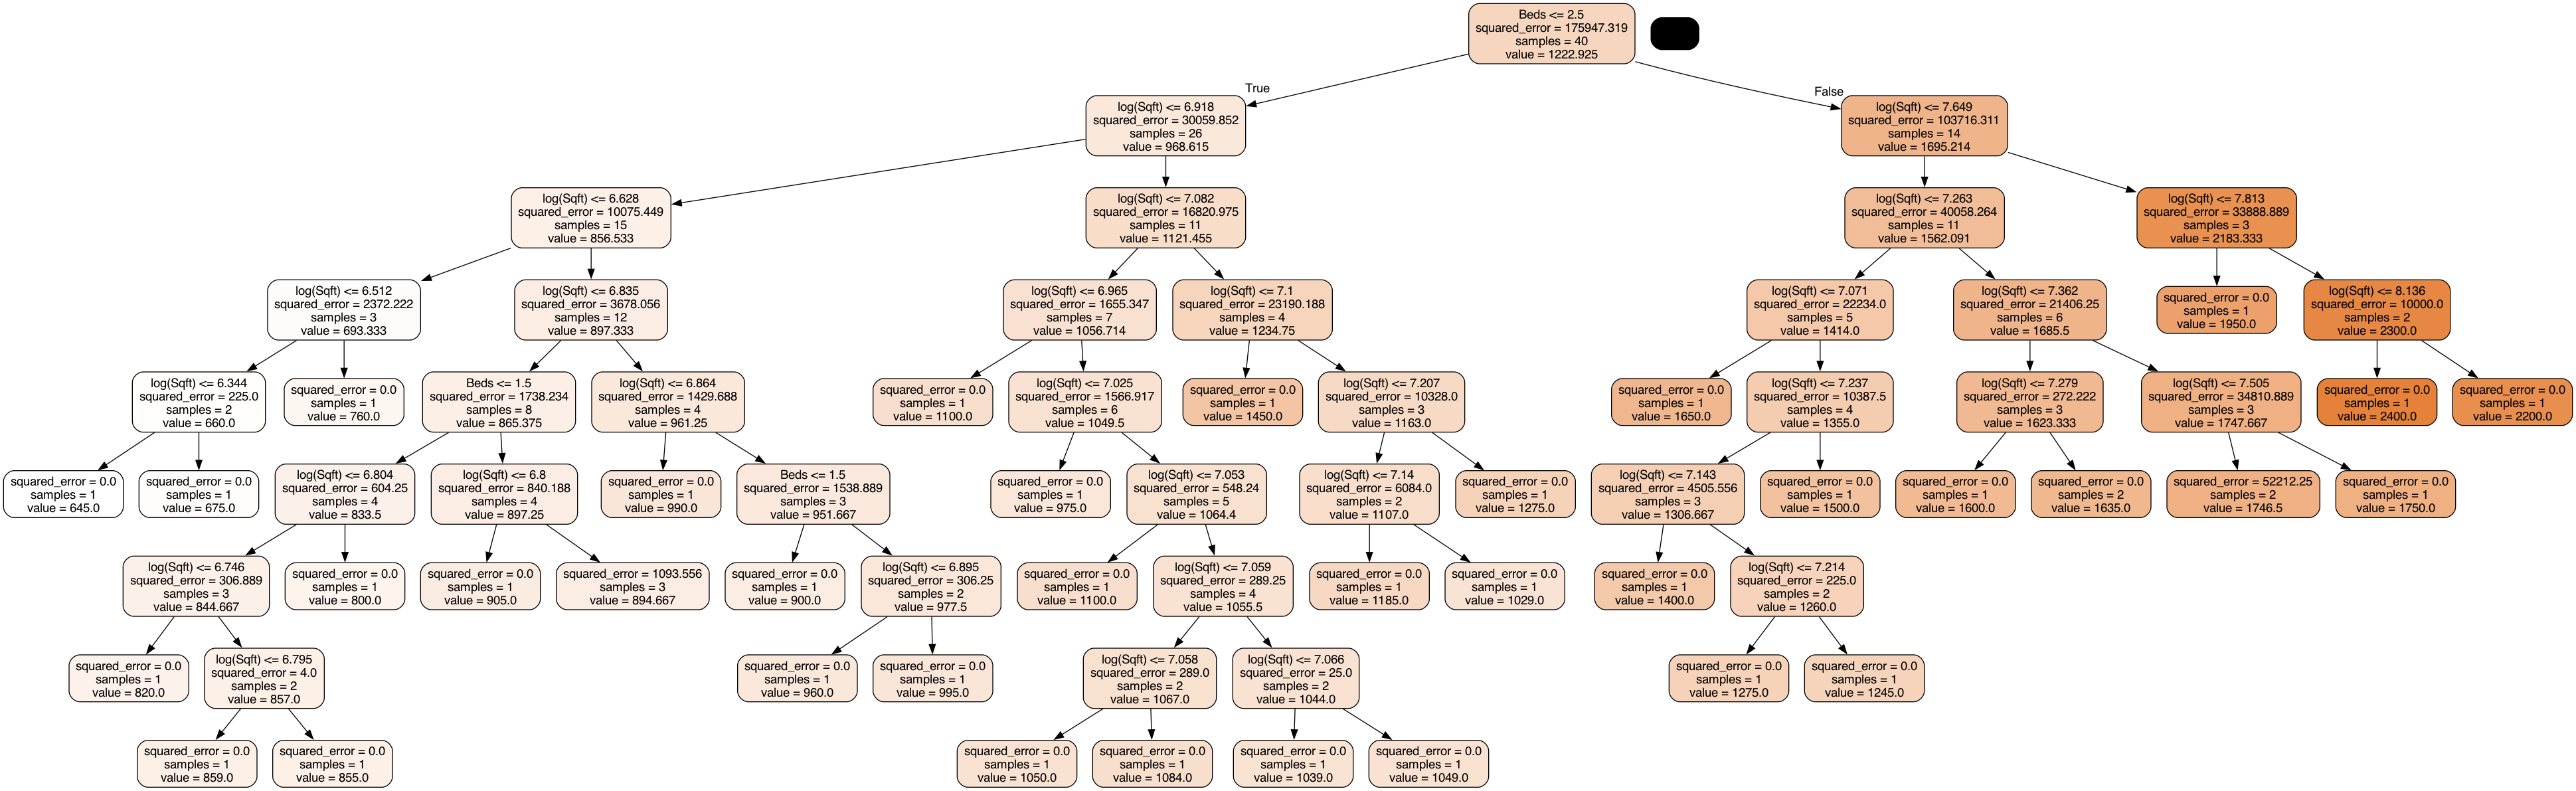

In [189]:
dot_data = StringIO()

export_graphviz(rt2, out_file=dot_data, filled=True, rounded=True,
                feature_names=annArborRegModel4Transformer(annArborDf).columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [190]:
pred = rt2.predict(annArborRegModel4Transformer(annArborDf))
pred

array([ 645.        ,  675.        ,  760.        ,  800.        ,
        820.        ,  894.66666667,  855.        ,  859.        ,
        900.        ,  894.66666667,  905.        ,  894.66666667,
        960.        ,  975.        ,  990.        ,  995.        ,
       1029.        , 1039.        , 1049.        , 1050.        ,
       1084.        , 1100.        , 1100.        , 1185.        ,
       1245.        , 1275.        , 1275.        , 1400.        ,
       1450.        , 1500.        , 1746.5       , 1600.        ,
       1635.        , 1635.        , 1650.        , 1750.        ,
       1950.        , 1746.5       , 2200.        , 2400.        ])

In [193]:
score = r2_score(annArborDf["Rent"], pred)
score

0.9846963899408561

In [195]:
rt2.transformer = annArborRegModel4Transformer
rt2.mainPredictor = partial(generalRegressionPredictor, rt2)

In [197]:
rt2.mainPredictor(rt2.transformer(annArborSampleData))

array([645.])

In [199]:
registerAJrjModel(
    rt2,
    {
        "modelName":f"annArborRegModel4Fit_RT2",
        "version":"1.0.8",
        "params": rt2.get_params(),
        "score": score,
        "modelLibraray": 'sklearn.tree.DecisionTreeRegressor',
        "libraryMetadata": {
            "feature_importances": rt2.feature_importances_.tolist(),
            "n_features": int(rt2.n_features_in_),
            "depth": int(rt2.get_depth()),
            "n_leaves": int(rt2.get_n_leaves()),
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/annArborRegModel4Fit_RT2__1.0.8.pkl.zip


{'_id': '685c96b0aa1bdf32036bac54',
 'modelName': 'annArborRegModel4Fit_RT2',
 'version': '1.0.8',
 'params': {'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': 42,
  'splitter': 'best'},
 'score': 0.9846963899408561,
 'modelLibraray': 'sklearn.tree.DecisionTreeRegressor',
 'libraryMetadata': {'feature_importances': [0.0,
   0.6949942523758,
   0.3050057476242],
  'n_features': 3,
  'depth': 8,
  'n_leaves': 36},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 7733,
 'zippedModelSizeBytes': 2755,
 's3Url': '273-g2/annArborRegModel4Fit_RT2__1.0.8.pkl.zip',
 'createdAt': '2025-06-26T00:39:12.832Z',
 'updatedAt': '2025-06-26T00:39:12.832Z'}

### Using Random Forest Regressor

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [206]:
rf.fit(annArborRegModel4Transformer(annArborDf), annArborDf["Rent"])

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [208]:
sample_tree = rf.estimators_[3]

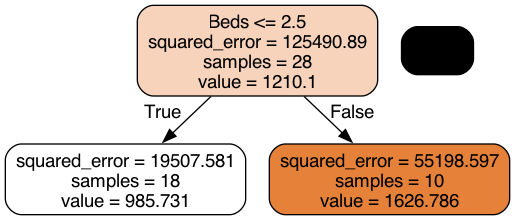

In [210]:
dot_data = StringIO()

export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=annArborRegModel4Transformer(annArborDf).columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [212]:
pred = rf.predict(annArborRegModel4Transformer(annArborDf))
pred

array([ 940.12365619,  940.12365619,  940.12365619,  940.12365619,
        940.12365619,  940.12365619,  940.12365619,  940.12365619,
        942.40250235,  940.12365619,  940.12365619,  940.12365619,
        942.40250235,  942.40250235,  942.40250235,  942.40250235,
       1302.96535155,  973.87085628, 1184.3298253 ,  963.04415079,
        969.35135079,  942.40250235,  942.40250235, 1282.95841133,
       1615.13774758, 1326.25615935, 1608.07628978, 1548.11100775,
       1274.57618076, 1631.36709758, 1631.36709758, 1631.36709758,
       1631.36709758, 1631.36709758, 1443.39472934, 1631.36709758,
       1631.36709758, 1631.36709758, 1631.36709758, 1631.36709758])

In [214]:
score = r2_score(annArborDf["Rent"], pred)
score

0.7216301067815047

In [216]:
rf.transformer = annArborRegModel4Transformer
rf.mainPredictor = partial(generalRegressionPredictor, rf)

In [220]:
registerAJrjModel(
    rf,
    {
        "modelName":f"raoyi_li_annArborRegModel4Fit_RF",
        "version":"1.0.9",
        "params": rf.get_params(),
        "score": score,
        "modelLibraray": 'sklearn.ensemble.RandomForestRegressor',
            "libraryMetadata": {
            "feature_importances": rf.feature_importances_.tolist(),
            "n_features": int(rf.n_features_in_),
            "avg_depth": float(sum(t.get_depth() for t in rf.estimators_) / len(rf.estimators_)),
            "avg_leaves": float(sum(t.get_n_leaves() for t in rf.estimators_) / len(rf.estimators_)),
        },
    
        "sampleData": {
            "dataForTransfer": annArborSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_annArborRegModel4Fit_RF__1.0.9.pkl.zip


{'_id': '685c96bdaa1bdf32036bac56',
 'modelName': 'raoyi_li_annArborRegModel4Fit_RF',
 'version': '1.0.9',
 'params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 5,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 100,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 42,
  'verbose': 0,
  'warm_start': False},
 'score': 0.7216301067815047,
 'modelLibraray': 'sklearn.ensemble.RandomForestRegressor',
 'libraryMetadata': {'feature_importances': [0.0,
   0.4194025015135677,
   0.5805974984864323],
  'n_features': 3,
  'avg_depth': 1.01,
  'avg_leaves': 2.01},
 'sampleData': {'dataForTransfer': {'Beds': [1],
   'Baths': [1.0],
   'Sqft': [500]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 49827,
 'zippedModelSizeBytes': 7201,
 's3Url': '